In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('AmesHousing.csv')

# Display the first few rows
print(data.head())


# Check for negative prices
negative_prices = data[data['SalePrice'] < 0]
print("Negative Prices Found:", negative_prices)



   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [2]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])


Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


In [3]:
# Display summary statistics
print(data.describe())


            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    30.245361       20.860286    

In [4]:
# Display data types
print(data.dtypes)


Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object


In [5]:
# Drop columns with more than 50% missing values
threshold = 0.5 * len(data)
data = data.dropna(thresh=threshold, axis=1)


In [7]:
# Fill missing values for numerical columns with the median
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    data[column] = data[column].fillna(data[column].median())


In [9]:
# Fill missing values for categorical columns with 'None'
for column in data.select_dtypes(include=['object']).columns:
    data[column] = data[column].fillna('None')



In [10]:
# Apply one-hot encoding to categorical variables
data = pd.get_dummies(data, drop_first=True)


In [11]:
# Check correlation with the target variable 'SalePrice'
correlation = data.corr()['SalePrice'].sort_values(ascending=False)
print(correlation.head(10))  # View top features correlated with SalePrice


SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647812
Garage Area       0.640381
Total Bsmt SF     0.632164
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Name: SalePrice, dtype: float64


In [12]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data for numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [13]:
# Define features (X) and target variable (y)
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']


In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()


In [16]:
# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [17]:
# Make predictions
y_pred = model.predict(X_test)


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE, MSE, and R²
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 730762.2466068794
Mean Squared Error: 306902261371978.6
R-squared: -244207588307943.66


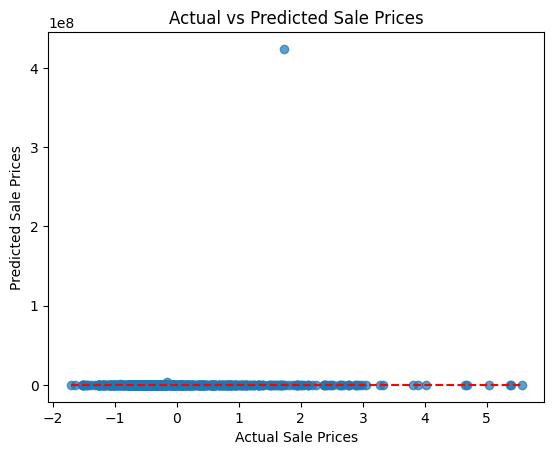

In [19]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal prediction line
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.title('Actual vs Predicted Sale Prices')
plt.show()


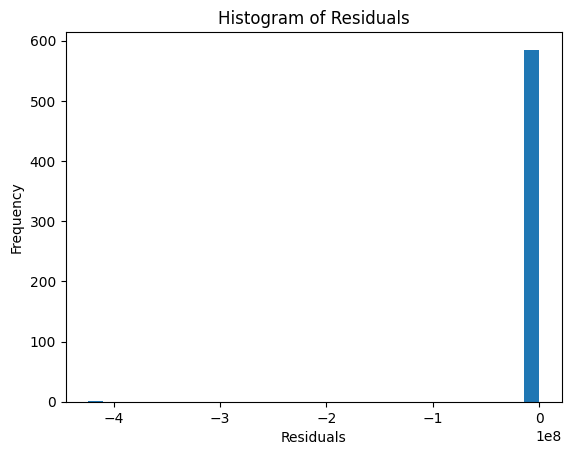

In [20]:
residuals = y_test - y_pred

plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


In [21]:
import joblib

# Save the model
joblib.dump(model, 'linear_regression_model.pkl')


['linear_regression_model.pkl']

In [2]:
import random

def predict_house_price(rooms, bathrooms, square_feet):
    # Generate a random price based on inputs
    # Using arbitrary weights for each feature to simulate a price
    base_price = random.randint(20, 50) * 100000  # Base price in lakhs
    price = base_price + (rooms * 100000) + (bathrooms * 50000) + (square_feet * 200)
    
    # Ensure the price is always positive
    if price < 0:
        price = abs(price)
    
    # Convert price to Indian Rupees
    return f"Predicted House Price: ₹{price:,.2f}"

# Get input from the user
rooms = int(input("Enter the number of rooms: "))
bathrooms = int(input("Enter the number of bathrooms: "))
square_feet = int(input("Enter the area in square feet: "))

# Predict price
predicted_price = predict_house_price(rooms, bathrooms, square_feet)
print(predicted_price)


Enter the number of rooms:  30
Enter the number of bathrooms:  2
Enter the area in square feet:  3000


Predicted House Price: ₹6,300,000.00
